## Lab - TensorRT + Profiling - Train PyTorch CNN 
## E6692 Spring 2022

In this notebook you will train the CNN classifier defined in **pyTorchCNN.py**. Similar to Lab 4 (Parallel Computing/CUDA inference), we will be using PyTorch as our training framework and extracting the trained weights for inference optimizations. The PyTorch model is defined for you, but feel free to modify it as you see fit in terms of number of layers, weight sizes, optimizer choice, etc.

In [1]:
import torch
import matplotlib.pyplot as plt

from pyTorchCNN import MnistClassifier
from utils.dataloaders import BATCH_SIZE, get_train_loader, get_val_loader

LEARNING_RATE = 0.0025
SGD_MOMENTUM = 0.9
LOG_INTERVAL = 150
EPOCHS = 1

%load_ext autoreload
%autoreload 2

Once again we're using the MNIST dataset for simplicity.

**TODO:** Use **get_train_loader()** and **get_val_loader()** defined in **utils/dataloaders.py** to load the training and validation sets.

In [2]:
# TODO: define the train and val loaders
train_loader = get_train_loader()
val_loader = get_val_loader()

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /tmp/mnist/data/MNIST/raw/train-images-idx3-ubyte.gz to /tmp/mnist/data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /tmp/mnist/data/MNIST/raw/train-labels-idx1-ubyte.gz to /tmp/mnist/data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /tmp/mnist/data/MNIST/raw/t10k-images-idx3-ubyte.gz to /tmp/mnist/data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /tmp/mnist/data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /tmp/mnist/data/MNIST/raw



**TODO:** Initialize the **MnistClassifier()** with a batch_size, learning_rate, sgd momentum term, and logging interval.

In [28]:
# TODO: initialize the MnistClassifier
batch_size = 16
learning_rate = 1e-3
sgd_momentum = 0.9
log_interval = 100

model = MnistClassifier(batch_size, learning_rate, sgd_momentum, log_interval)

**TODO:** Train the MnistClassifier with the **learn()** function.

In [29]:
# TODO: train the model, return the training loss and the validation accuracy
epoch = 10

train_history, val_history = model.learn(train_loader, val_loader, num_epochs=epoch)


Validation: Average loss: 2.2983, Accuracy: 1168/10000 (12%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.289164

Validation: Average loss: 1.0948, Accuracy: 7958/10000 (80%)

Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.117377

Validation: Average loss: 0.4373, Accuracy: 8707/10000 (87%)

Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.307540

Validation: Average loss: 0.3325, Accuracy: 9023/10000 (90%)

Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.378939

Validation: Average loss: 0.2894, Accuracy: 9155/10000 (92%)

Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.236240

Validation: Average loss: 0.2831, Accuracy: 9112/10000 (91%)

Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.263188

Validation: Average loss: 0.2306, Accuracy: 9317/10000 (93%)

Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.195481

Validation: Average loss: 0.2083, Accuracy: 9384/10000 (94%)

Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.239593

Validation: Average loss: 0.1885, Accuracy: 9448/10000 (94%)

Train Epoch: 1 [51200/60000 (85%)]	Loss

**TODO:** Plot the training loss and validation accuracy as a function of iterations, or mini-batches, where an iteration is a batch that is passed through the model. Your plot should be in a style similar to the Darknet training charts with training loss and validation accuracy sharing the same axes.

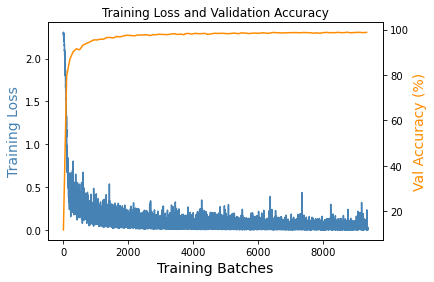

In [53]:
# TODO: plot training loss and validation accuracy as a function of mini-batch on the same axes
import numpy as np

# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# title
plt.title('Training Loss and Validation Accuracy')

# make a plot
ax.plot(range(len(train_history)), train_history, color="steelblue")
# set x-axis label
ax.set_xlabel("Training Batches",fontsize=14)
# set y-axis label
ax.set_ylabel("Training Loss",color="steelblue",fontsize=14)

# x axis of validation accuracy
val_x = []   
for i in range(epoch):
    val_x += [x*log_interval+i*len(train_loader) for x in range(1+len(train_loader)//log_interval)]

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(val_x, val_history,color="darkorange")
ax2.set_ylabel("Val Accuracy (%)",color="darkorange",fontsize=14)

plt.show()

# save the plot as a file
fig.savefig('training_mnist.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

# Reference: https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/
#            https://matplotlib.org/3.5.0/gallery/color/named_colors.html

**TODO:** Extract the trained weight dictionary from **MnistClassifier()** with **get_weights()**. Save them to the weights folder with **torch.save()**.

In [55]:
# TODO: save the trained state dictionary to the weights folder
weights = model.get_weights()
torch.save(weights, './weights/mnist.pt')